In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels import api as sm

In [2]:
# used absolute path
df = pd.read_csv(r"C:\Users\jules_7owst96\code\Grand Circus\Week6\sat_gpa_v1.csv")

In [3]:
# checking out df 
df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


In [4]:
# based on this we have no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [5]:
df.describe()

,sat_sum,fy_gpa
count,1000.000000,1000.000000
mean,1033.290000,2.467950
std,142.873681,0.740805
min,530.000000,0.000000
25%,930.000000,1.980000
50%,1030.000000,2.465000
75%,1130.000000,3.020000
max,1440.000000,4.000000


In [6]:
# check for duplicates
df.duplicated().sum()
# it makes sense for us to have duplicates

49

## Scatter Plot GPA vs SAT with Linear Regression

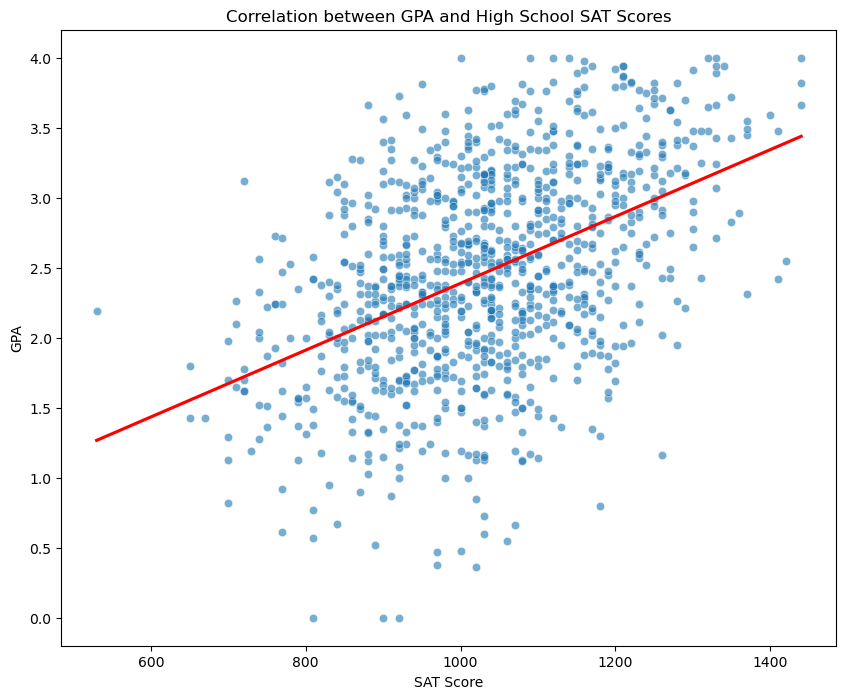

In [68]:
# scatter plot 
plt.figure(figsize=(10, 8)) 
sns.scatterplot(data=df, x='sat_sum', y='fy_gpa', alpha=0.6)  # alpha adds opacity
plt.title('Correlation between GPA and High School SAT Scores')


# linear regression
X = df['sat_sum']  # independent variable
Y = df['fy_gpa']  # dependent variable

# add column for the constant
X = sm.add_constant(X)  # add constant to make model more accurate 
X.head()  # checking myself

# run model
model = sm.OLS(Y, X).fit()

# plot regression(fit data to model)
sns.regplot(x=X['sat_sum'], y=model.predict(X), scatter=False, color='red')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()


In [69]:
# print table of results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 fy_gpa   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.39e-53
Time:                        15:45:37   Log-Likelihood:                -999.38
No. Observations:                1000   AIC:                             2003.
Df Residuals:                     998   BIC:                             2013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.152      0.013      0.9

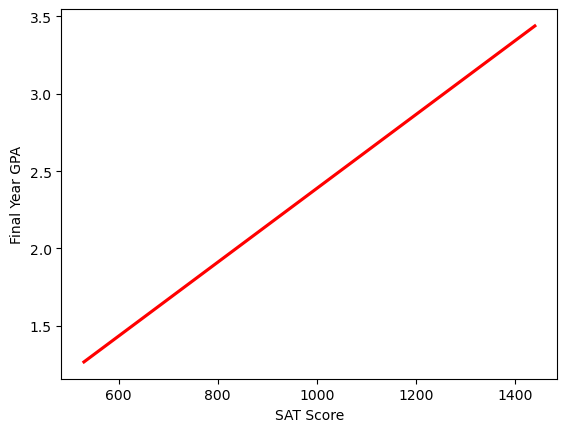

In [63]:
# just the regression line without constant
# see how we would be starting at zero
sns.regplot(x=['sat_sum'], y=model.predict(X), scatter=False, color='red')
plt.xlabel('SAT Score')
plt.ylabel('Final Year GPA')
plt.show()

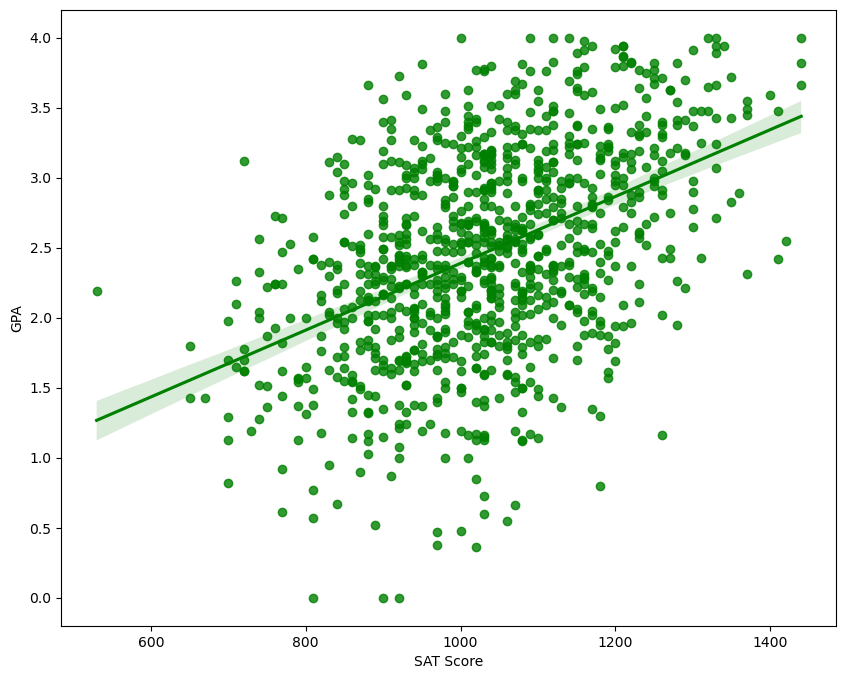

In [65]:
# we could also plot regression line like this 
# plot regression
plt.figure(figsize=(10,8))
sns.regplot(data=df, x=df.sat_sum, y=df.fy_gpa, color='Green')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()


<Figure size 1000x800 with 0 Axes>

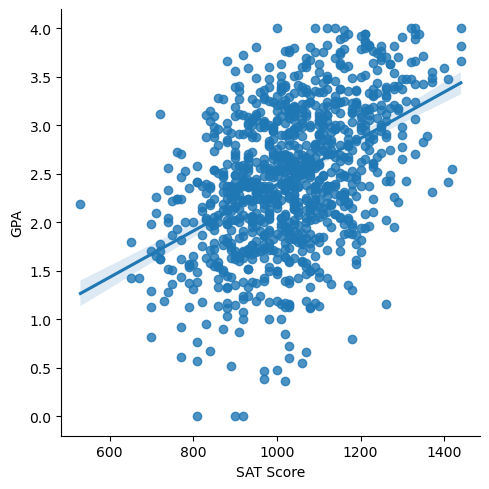

In [66]:
# or we could plot line using lm plot

# plot regression
plt.figure(figsize=(10,8))
sns.lmplot(data=df, x="sat_sum", y="fy_gpa")
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()

In [67]:
# Equation of regression line
coefficients = model.params
print(coefficients)
print(f'Regression Equation: college_gpa = {coefficients[0]: 2f} + {coefficients[1]: 2f} * sat_score' )

const      0.001927
sat_sum    0.002387
dtype: float64
Regression Equation: college_gpa =  0.001927 +  0.002387 * sat_score


C:\Users\jules_7owst96\AppData\Local\Temp\ipykernel_12672\2247573393.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Regression Equation: college_gpa = {coefficients[0]: 2f} + {coefficients[1]: 2f} * sat_score' )


## Analysis
The R-squared value is 0.212, indicating that approximately 21.2% of the variance in the dependent variable (GPA) is explained by the independent variable (SAT score).

When we look at the coefficient of SAT scores, for every extra point a student gets on their SAT, their predicted college GPA goes up by 0.0024 points, on average. And those numbers are pretty reliable because they have p-values less than 0.05.

In summary, there is a statistically significant relationship between SAT score and college GPA. However, given the low R-squared value, SAT score alone might not be a strong predictor of college GPA.